# More comparison between time model and distance model
===========

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import json
import space as sp
from data_extracter import json_extracter
import pandas as pd

data,events=json_extracter('data/game1.json')

## Pressure evolution
-----

We look at the pressure exerced by the closest defender of on player. For the distance model, the pressure is defined by the distance between the player and the closest defender. Then, for the time model, the pressure is defined by the time that the closest defender needs to join player's position. 

We are going to compare these two types of pressure (distance pressure and time pressure).

In [2]:
def distance_closest_defender(a,mom_infos,defensive_team):
    defenders=mom_infos['defensive_team']
    dmin=np.inf
    for player in defenders.keys():
        d=sp.distance(defenders[player]['xy'],a)
        if d<dmin:
            dmin=d
    

## Court evolution
-----

Let's have a look at the lage between time model and distance model. To do so, we plot the heat-map taking into account inertia at a moment t. Then we plot the court with distance model at t and then t+Dt. It semms that the heat-map with inertia corresponds more with distance heat-map at t+Dt.

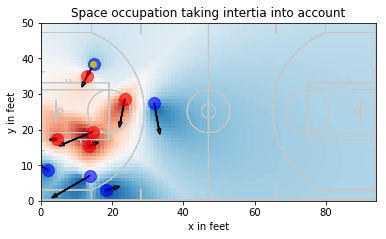

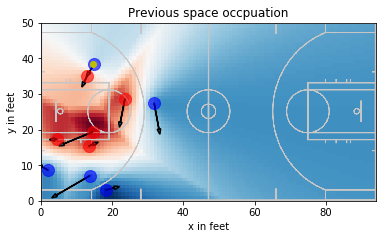

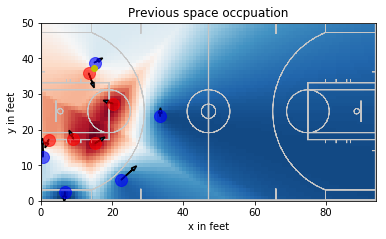

In [175]:
plt.figure(1)
plt.title('Space occupation taking intertia into account')
sp.print_court_teams_occupation_inertia(events,0,55)
plt.figure(2)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,55,value=True)
plt.figure(3)
plt.title('Previous space occpuation')
sp.print_court_teams_occupation(events,0,89,value=True)

We are going to try to quantify this observation. To do so, we calculate the correlation between space occupation with time and distance model and it will give us the lag. As force is the factor that can change in our study, we calculate the correlation for different forces and then we look the evolution of the correlation in function of forces. Here are the results.

In [7]:
import pandas as pd
lags=pd.read_csv('data/total_df.csv',sep = ',',index_col=[1,0,2])
lags.dropna(inplace=True)

In [173]:
lags.loc[10]

R  tau       rho   time
Unnamed: 0 Unnamed: 2                                
2          0           0.452588   34  0.714461  20.47
           1           0.461092   34  0.714461  20.47
           2           0.469724   34  0.714461  20.47
           3           0.478543   34  0.714461  20.47
           4           0.487557   34  0.714461  20.47
           5           0.496729   34  0.714461  20.47
           6           0.506064   34  0.714461  20.47
           7           0.515611   34  0.714461  20.47
           8           0.525279   34  0.714461  20.47
           9           0.535272   34  0.714461  20.47
           10          0.545394   34  0.714461  20.47
           11          0.555617   34  0.714461  20.47
           12          0.565842   34  0.714461  20.47
           13          0.576695   34  0.714461  20.47
           14          0.586976   34  0.714461  20.47
           15          0.597217   34  0.714461  20.47
           16          0.607328   34  0.714461  20.47
           17          0.617393   34  0.714461  20.47
           18          0.627413   34  0.714461  20.47
           19          0.637113   34  0.714461  20.47
           20          0.646479   34  0.714461  20.47
           21          0.655456   34  0.714461  20.47
           22          0.664185   34  0.714461  20.47
           23          0.672424   34  0.714461  20.47
           24          0.679677   34  0.714461  20.47
           25          0.686321   34  0.714461  20.47
           26          0.692400   34  0.714461  20.47
           27          0.697653   34  0.714461  20.47
           28          0.702091   34  0.714461  20.47
           29          0.705946   34  0.714461  20.47
...                         ...  ...       ...    ...
30         95          0.149674   36  0.800315  14.97
           96          0.135997   36  0.800315  14.97
           97          0.121959   36  0.800315  14.97
           98          0.108005   36  0.800315  14.97
           99          0.094030   36  0.800315  14.97
           100         0.080140   36  0.800315  14.97
           101         0.066210   36  0.800315  14.97
           102         0.052650   36  0.800315  14.97
           103         0.039170   36  0.800315  14.97
           104         0.025946   36  0.800315  14.97
           105         0.012676   36  0.800315  14.97
           106        -0.000389   36  0.800315  14.97
           107        -0.013287   36  0.800315  14.97
           108        -0.026037   36  0.800315  14.97
           109        -0.038690   36  0.800315  14.97
           110        -0.051149   36  0.800315  14.97
           111        -0.063602   36  0.800315  14.97
           112        -0.075705   36  0.800315  14.97
           113        -0.087546   36  0.800315  14.97
           114        -0.099178   36  0.800315  14.97
           115        -0.110829   36  0.800315  14.97
           116        -0.122178   36  0.800315  14.97
           117        -0.133482   36  0.800315  14.97
           118        -0.144748   36  0.800315  14.97
           119        -0.155894   36  0.800315  14.97
           120        -0.166666   36  0.800315  14.97
           121        -0.177242   36  0.800315  14.97
           122        -0.187646   36  0.800315  14.97
           123        -0.197769   36  0.800315  14.97
           124        -0.207447   36  0.800315  14.97

[1625 rows x 4 columns]

Time of the study

### Correlation max function of force

First we look at the correlation max function of the force. 

In [172]:
df=lags[['rho','time']].max(level=(0,1))
df.head(10)

,rho,time
Unnamed: 0,,
2,0.714461,20.47
6,0.782991,26.87
7,0.781021,20.89
8,0.686445,26.87
10,0.680127,18.89
13,0.790223,22.88
14,0.684149,21.48
20,0.787919,17.50
22,0.787761,13.13


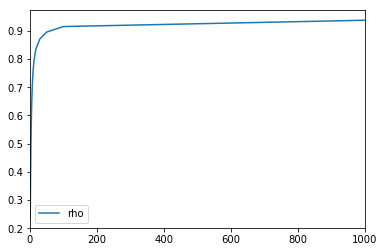

In [139]:
rho_mean=df[['rho']].mean(level=(0))
rho_mean.plot()

Let's drop too big values of f to see more details. Let's also plot the deviation

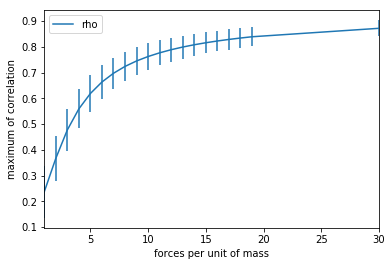

In [140]:
fig, ax = plt.subplots()
rho_mean=df.drop([50,100,1000])[['rho']].mean(level=(0))
rho_std=df.drop([50,100,1000])[['rho']].std(level=(0))
rho_mean.plot(yerr=rho_std, ax=ax)
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')

Let's make an average for each force weighed by the time of the sequence.

In [141]:
import numpy as np

In [142]:
def weighted(row, cols, w="time"):
    return (np.average(row[cols], weights=row[w]))


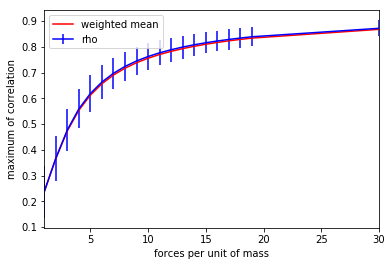

In [143]:
rho_mean_w=df.drop([50,100,1000]).groupby(level=0).apply(weighted, cols='rho', w='time')
fig, ax = plt.subplots()
rho_mean.plot(yerr=rho_std, ax=ax, color='b', label='mean')
rho_mean_w.plot(ax=ax, color='r', label='weighted mean')
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')
plt.legend()

We can see that there are no differences when weighted the mean. However, the curve seems to be clause to 1-1/exp. Let's compare

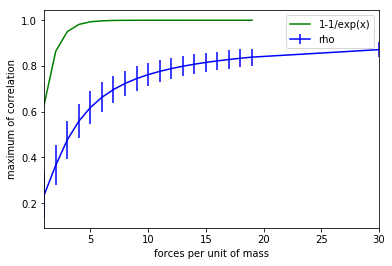

In [144]:
fig, ax = plt.subplots()
rho_mean.plot(yerr=rho_std, ax=ax, color='b', label='mean')
x=np.arange(1,20,1)
y=1-1/np.exp(x)
plt.plot(x,y,'green',label='1-1/exp(x)')
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')
plt.legend()

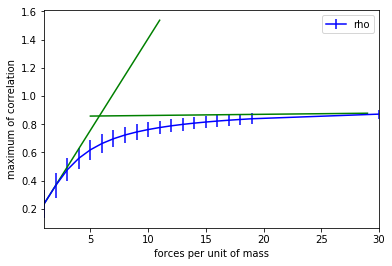

In [145]:
fig, ax = plt.subplots()
rho_mean.plot(yerr=rho_std, ax=ax, color='b', label='mean')
x=np.arange(1,12,1)
x2=np.arange(5,30,1)
y=0.13*x+0.107
y2=0.00084008*x2+0.853491
plt.plot(x,y,'green')
plt.plot(x2,y2,'green')
plt.xlabel('forces per unit of mass')
plt.ylabel('maximum of correlation')
plt.legend()

It seems that interception point is close to f=5,8N/kg

### Lag function of force

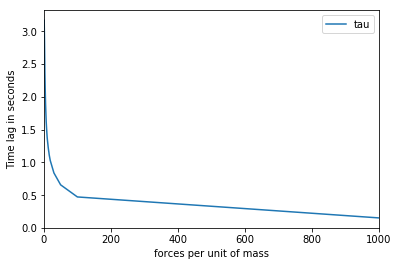

In [146]:
df=lags[['tau','time']].max(level=(0,1))
df['tau']=df['tau']*0.04
fig, ax = plt.subplots()
tau_mean=df[['tau']].mean(level=(0))
tau_mean.plot(ax=ax)
plt.xlabel('forces per unit of mass')
plt.ylabel('Time lag in seconds')
plt.legend()

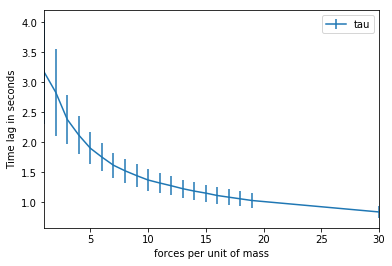

In [147]:
fig, ax = plt.subplots()
tau_mean=df.drop([50,100,1000])[['tau']].mean(level=(0))
tau_std=df.drop([50,100,1000])[['tau']].std(level=(0))
tau_mean.plot(yerr=tau_std, ax=ax)
plt.xlabel('forces per unit of mass')
plt.ylabel('Time lag in seconds')
plt.legend()

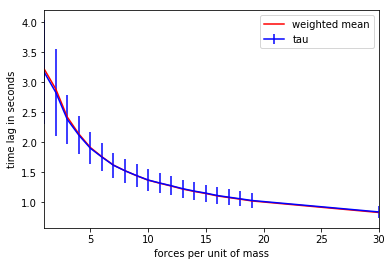

In [151]:
tau_mean_w=df.drop([50,100,1000]).groupby(level=0).apply(weighted, cols='tau', w='time')
fig, ax = plt.subplots()
tau_mean.plot(yerr=tau_std, ax=ax, color='b', label='mean')
tau_mean_w.plot(ax=ax, color='r', label='weighted mean')
plt.xlabel('forces per unit of mass')
plt.ylabel('time lag in seconds')
plt.legend()

### Correlations in the same plot

/Users/gabin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


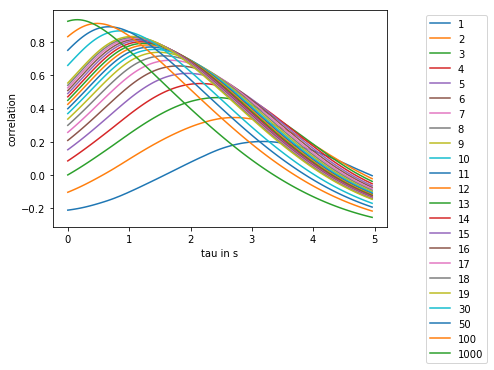

In [171]:
fig, ax = plt.subplots()
Rho=lags[['R']].mean(level=(0,2))
ind=[i for i in range(1,20)]+[30,50,100,1000]
for i in ind:
    time=lags.loc[(1,2)].index*0.04
    plt.plot(time,Rho.loc[i],label=str(i))
plt.legend(bbox_to_anchor=(1.1, 1.))
plt.xlabel('tau in s')
plt.ylabel('correlation')